# Initial Code for CCXT 

In [653]:
import ccxt

# Getting Data from Binance for BTC

In [654]:
# Use your Binance API credentials
exchange = ccxt.binance({
    'apiKey': 'rKI3q7RZSOwaKmtEdpJr8gzW2ck32ZXVAUWhwajXU88pHlrm0cnKqyHWy2n2gbRJ',
    'secret': 'RfA74xF2DloTmJcHSVsIMnpk7YbHhfI4iV1SVv8NIR1pHf1rnCl8n14hfNSWXTiu',
    'options': {'defaultType': 'future'}  # Ensure futures trading mode
})

# Fetch the order book for a symbol (e.g., 'BTC/USDT')
order_book = exchange.fetch_order_book('BTC/USDT')

# Creating the Parameters for the Bot

In [ ]:
# Grid Trading Parameters
symbol = 'BTC/USDT'  # Trading pair
grid_levels = 50  # Number of grid orders
grid_spacing = 100  # Price gap between grid orders ## maybe to 50
order_size = 0.01  # Order size in BTC
leverage = 1 # Leverage multiplier
# Set leverage properly
exchange.set_leverage(leverage, symbol)

{'symbol': 'BTCUSDT', 'leverage': '1', 'maxNotionalValue': '1800000000'}

In [656]:
# Get initial price
price_data = exchange.fetch_ticker(symbol)
initial_price = price_data['last']

# Generate grid price levels
grid_prices = [initial_price + (i - grid_levels // 2) * grid_spacing for i in range(grid_levels)]
print(grid_prices)

[79323.1, 79423.1, 79523.1, 79623.1, 79723.1, 79823.1, 79923.1, 80023.1, 80123.1, 80223.1, 80323.1, 80423.1, 80523.1, 80623.1, 80723.1, 80823.1, 80923.1, 81023.1, 81123.1, 81223.1, 81323.1, 81423.1, 81523.1, 81623.1, 81723.1, 81823.1, 81923.1, 82023.1, 82123.1, 82223.1, 82323.1, 82423.1, 82523.1, 82623.1, 82723.1, 82823.1, 82923.1, 83023.1, 83123.1, 83223.1, 83323.1, 83423.1, 83523.1, 83623.1, 83723.1, 83823.1, 83923.1, 84023.1, 84123.1, 84223.1]


In [657]:
import pandas as pd

# Initialize Binance exchange (without API keys for public data)
exchange = ccxt.binance()

# Fetch historical data (Example: BTC/USDT)
bars = exchange.fetch_ohlcv('BTC/USDT', timeframe='1d', limit= 180) ##

# Convert to DataFrame
df = pd.DataFrame(bars, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to readable date
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Save to CSV file
df.to_csv('binance_data_1.csv', index=False)

print("✅ Binance data downloaded and saved as 'binance_data.csv'")


✅ Binance data downloaded and saved as 'binance_data.csv'


In [658]:
df = pd.read_csv("binance_data_1.csv")

# Print column names
print("Columns in CSV:", df.columns)

# Show first few rows
print(df.head())

print(df.tail())

Columns in CSV: Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
    timestamp      open      high       low     close       volume
0  2024-09-02  57301.77  59425.69  57128.00  59132.13  22895.01461
1  2024-09-03  59132.12  59809.65  57415.00  57487.73  22828.18447
2  2024-09-04  57487.74  58519.00  55606.00  57970.90  35560.82146
3  2024-09-05  57970.90  58327.07  55643.65  56180.00  27806.91413
4  2024-09-06  56180.00  57008.00  52550.00  53962.97  54447.76826
      timestamp      open      high       low     close       volume
175  2025-02-24  96258.00  96500.00  91349.26  91552.88  31550.10299
176  2025-02-25  91552.88  92540.69  86050.99  88680.40  78333.11111
177  2025-02-26  88680.39  89414.15  82256.01  84250.09  56893.54409
178  2025-02-27  84250.09  87078.46  82716.49  84708.58  42505.45439
179  2025-02-28  84708.57  84892.85  78258.52  81923.10  61433.19631


## Plot out smoothed price change to learn about the price trend

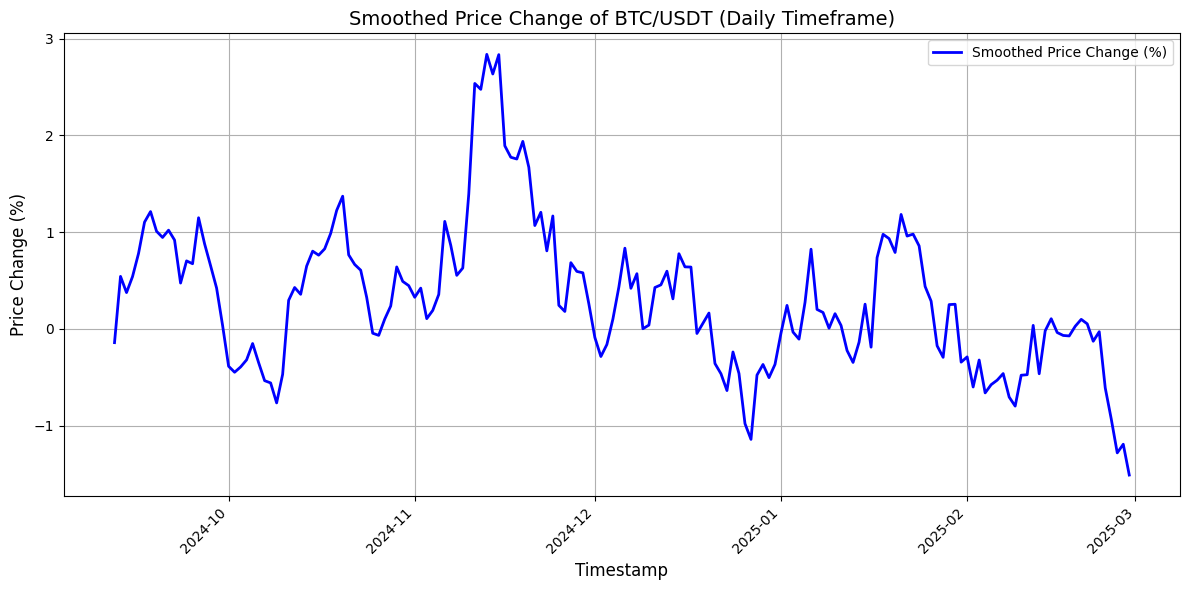

In [659]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Binance exchange (without API keys for public data)
exchange = ccxt.binance()

# Fetch historical data (Example: BTC/USDT, daily timeframe)
bars = exchange.fetch_ohlcv('BTC/USDT', timeframe='1d', limit= 180) ##

# Convert to DataFrame
df = pd.DataFrame(bars, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to readable date
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calculate the price change (percentage change in closing price)
df['price_change'] = df['close'].pct_change() * 100  # Percentage change

# Apply rolling average to smooth the plot (optional)
df['smoothed_change'] = df['price_change'].rolling(window=10).mean()  # 10-period rolling average

# Plot the price change
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(df['timestamp'], df['smoothed_change'], label='Smoothed Price Change (%)', color='blue', linewidth=2)

# Title and labels
plt.title('Smoothed Price Change of BTC/USDT (Daily Timeframe)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Price Change (%)', fontsize=12)

# Adjust x-ticks to prevent overlap
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels and align them to the right
plt.tight_layout()  # Adjust layout to fit labels

# Show grid, legend, and plot
plt.grid(True)
plt.legend()
plt.show()


In [660]:
print(df['close'].describe())  # See min, max, mean close prices
print(df['close'].unique()[:10])  # Print first 10 unique prices

count       180.000000
mean      84420.635611
std       16693.713393
min       53962.970000
25%       66980.187500
50%       94012.380000
75%       97679.447500
max      106143.820000
Name: close, dtype: float64
[59132.13 57487.73 57970.9  56180.   53962.97 54160.86 54869.95 57042.
 57635.99 57338.  ]


In [661]:
# Initialize Binance exchange
exchange = ccxt.binance()

# Fetch current BTC/USDT price
ticker = exchange.fetch_ticker('BTC/USDT')
current_price = ticker['last']
print(f"Current BTC Price: {current_price}")

# Generate dynamic grid prices (±1% steps)
grid_step = 0.005  ## # If highly volatile, increase grid_step, vice versa
num_grids = 165     # Number of grid levels ##


grid_prices = sorted([ 
    round(initial_price * (1 + grid_step * i), 2) for i in range(1 - num_grids, num_grids) 
    if (initial_price * (1 + grid_step * i)) > 0
])

print(f"Grid Prices: {grid_prices}")

# Load historical data
df = pd.read_csv('binance_data.csv')
df['time'] = pd.to_datetime(df['timestamp'])
df.set_index('time', inplace=True)

Current BTC Price: 81901.82
Grid Prices: [14728.16, 15137.27, 15546.39, 15955.5, 16364.62, 16773.74, 17182.85, 17591.97, 18001.08, 18410.2, 18819.31, 19228.43, 19637.54, 20046.66, 20455.78, 20864.89, 21274.01, 21683.12, 22092.24, 22501.35, 22910.47, 23319.58, 23728.7, 24137.81, 24546.93, 24956.05, 25365.16, 25774.28, 26183.39, 26592.51, 27001.62, 27410.74, 27819.85, 28228.97, 28638.08, 29047.2, 29456.32, 29865.43, 30274.55, 30683.66, 31092.78, 31501.89, 31911.01, 32320.12, 32729.24, 33138.36, 33547.47, 33956.59, 34365.7, 34774.82, 35183.93, 35593.05, 36002.16, 36411.28, 36820.39, 37229.51, 37638.63, 38047.74, 38456.86, 38865.97, 39275.09, 39684.2, 40093.32, 40502.43, 40911.55, 41320.67, 41729.78, 42138.9, 42548.01, 42957.13, 43366.24, 43775.36, 44184.47, 44593.59, 45002.71, 45411.82, 45820.94, 46230.05, 46639.17, 47048.28, 47457.4, 47866.51, 48275.63, 48684.74, 49093.86, 49502.98, 49912.09, 50321.21, 50730.32, 51139.44, 51548.55, 51957.67, 52366.78, 52775.9, 53185.01, 53594.13, 54003.2

## Hidden parameters

In [662]:
# Hidden parameters validation
def validate_grid_parameters(initial_price, grid_levels, grid_spacing, leverage):
    # 1. Price Range
    MIN_PRICE = 556.8
    MAX_PRICE = 4529764
    # 2. Number of Grids
    MIN_GRIDS = 2
    MAX_GRIDS = 169
    # 3. Investment
     # the investment is the margin amount transferred from the futures account 
     # to create the grid. The total investment = investment * leverage. 
    MIN_LEVERAGE = 1
    MAX_LEVERAGE = 1
    # 4. Choose 'arithmetic' or 'geometric'
    grid_type = 'geometric' 

    if current_price - (grid_levels * grid_spacing) < MIN_PRICE:
        raise ValueError("Grid buy orders exceed Binance's minimum price limit.")
    if current_price + (grid_levels * grid_spacing) > MAX_PRICE:
        raise ValueError("Grid sell orders exceed Binance's maximum price limit.")
    if not (MIN_GRIDS <= grid_levels <= MAX_GRIDS):
        raise ValueError(f"Number of grid levels must be between {MIN_GRIDS} and {MAX_GRIDS}.")
    if not (MIN_LEVERAGE <= leverage <= MAX_LEVERAGE):
        raise ValueError(f"Leverage must be between {MIN_LEVERAGE}x and {MAX_LEVERAGE}x.")

    print("Hidden parameters validated successfully.")

# Validate parameters before trading
try:
    validate_grid_parameters(initial_price, grid_levels, grid_spacing, leverage)
    print("Proceeding to buy and sell...")
    last_trade = None
except ValueError as e:
    print("Validation Error:", e)

Hidden parameters validated successfully.
Proceeding to buy and sell...


## Simulate Trading

In [663]:
print(f"Current BTC Price: {current_price}")
print(f"Grid Prices: {grid_prices}")

# Initialize tracking variables
capital = 10000  # Initial capital in USDT
btc_holding = 0  # Amount of BTC held
trade_log = []  # Store trade records (buy/sell, price, timestamp, BTC amount)
returns = []  # Store percentage returns for Sharpe ratio
capital_over_time = [capital]  # Track capital over time for MDD calculation
total_profit = 0  # Variable to keep track of total profit

# Track last trade direction
last_trade = None  

# Simulate trading
for index, row in df.iterrows():
    price = row['close']

    for grid_price in grid_prices:
        if abs(price - grid_price) <= 10:  # Allow small variation
            
            if last_trade == "SELL" or last_trade is None:
                # Buy BTC
                btc_holding = capital / price  # Use all capital to buy BTC
                trade_log.append(("BUY", price, index, btc_holding))
                last_trade = "BUY"
                print(f"🟢 BUY at {price} on {index}")

            elif last_trade == "BUY":
                # Sell BTC
                sell_value = btc_holding * price  # Total value after selling
                profit = sell_value - capital  # Net profit
                returns.append(profit / capital)  # Store return percentage
                trade_log.append(("SELL", price, index, sell_value))
                last_trade = "SELL"
                print(f"🔴 SELL at {price} on {index} (Profit: {profit:.2f} USDT)")
                
                # Reset BTC holdings and update capital
                capital += profit
                total_profit += profit  # Update the total profit
                capital_over_time.append(capital)  # Track capital value over time

# Print the total profit after all trades
print(f"Total Profit: {total_profit:.2f} USDT")

Current BTC Price: 81901.82
Grid Prices: [14728.16, 15137.27, 15546.39, 15955.5, 16364.62, 16773.74, 17182.85, 17591.97, 18001.08, 18410.2, 18819.31, 19228.43, 19637.54, 20046.66, 20455.78, 20864.89, 21274.01, 21683.12, 22092.24, 22501.35, 22910.47, 23319.58, 23728.7, 24137.81, 24546.93, 24956.05, 25365.16, 25774.28, 26183.39, 26592.51, 27001.62, 27410.74, 27819.85, 28228.97, 28638.08, 29047.2, 29456.32, 29865.43, 30274.55, 30683.66, 31092.78, 31501.89, 31911.01, 32320.12, 32729.24, 33138.36, 33547.47, 33956.59, 34365.7, 34774.82, 35183.93, 35593.05, 36002.16, 36411.28, 36820.39, 37229.51, 37638.63, 38047.74, 38456.86, 38865.97, 39275.09, 39684.2, 40093.32, 40502.43, 40911.55, 41320.67, 41729.78, 42138.9, 42548.01, 42957.13, 43366.24, 43775.36, 44184.47, 44593.59, 45002.71, 45411.82, 45820.94, 46230.05, 46639.17, 47048.28, 47457.4, 47866.51, 48275.63, 48684.74, 49093.86, 49502.98, 49912.09, 50321.21, 50730.32, 51139.44, 51548.55, 51957.67, 52366.78, 52775.9, 53185.01, 53594.13, 54003.2

### Sharpe Ratio

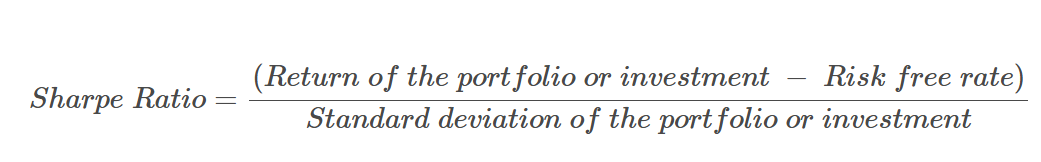

In [672]:
print(returns)

# Calculate the Sharpe Ratio
mean_return = np.mean(returns)  # Average return
std_dev_return = np.std(returns, ddof=1)  # Standard deviation of returns

# Risk-free rate (assuming 5% annually, convert to daily)
annual_risk_free_rate = 0.05
daily_risk_free_rate = annual_risk_free_rate / 365  
# Calculate the excess return
excess_return = mean_return - daily_risk_free_rate

# Sharpe Ratio calculation
sharpe_ratio = excess_return / std_dev_return  # Standard Sharpe ratio formula

# Print Sharpe Ratio
print(f"Sharpe Ratio: {sharpe_ratio}")



[np.float64(-0.03020220894056183), np.float64(-0.02548039133630753), np.float64(-0.005074972230369026), np.float64(0.1022026490080848), np.float64(0.04878350103089385), np.float64(0.3345855309606277), np.float64(-0.00974144442388929), np.float64(-0.003090957245194298), np.float64(8.623266280783681e-06), np.float64(0.0032470264626046283), np.float64(0.08303200544244978)]
Sharpe Ratio: 0.42903061760527034


### MDD

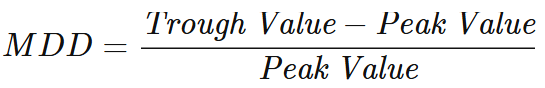

In [665]:
# Calculate Maximum Drawdown (MDD)
capital_series = pd.Series(capital_over_time)

# Step 1: Find the running peak (maximum value)
running_max = capital_series.cummax() # cumulative maximum

# Step 2: Calculate the drawdown as the difference between the peak and current value
drawdown = (capital_series - running_max) / running_max

# Step 3: Calculate the Maximum Drawdown (MDD)
MDD = drawdown.min()

# Step 4: Print the result
print(f"Maximum Drawdown (MDD): {MDD * 100:.2f}%")

Maximum Drawdown (MDD): -18.64%


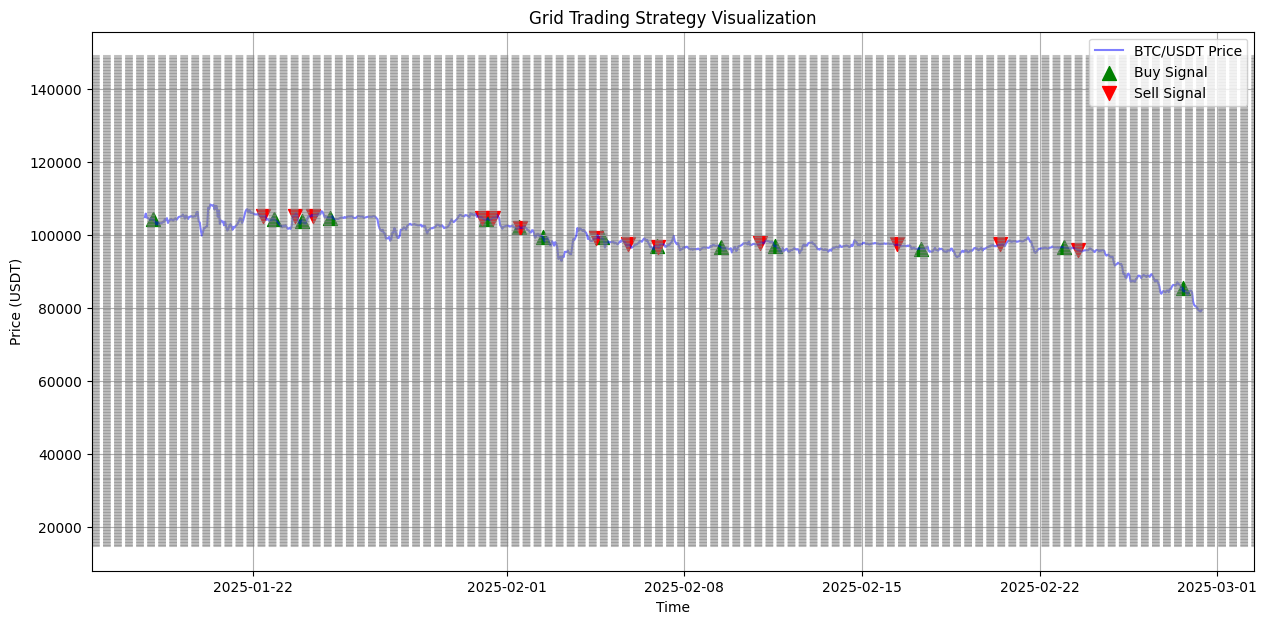

In [666]:
import matplotlib.pyplot as plt


# Expand time frame to include 2025
df = df.loc[df.index >= '2025-01-01']  # Show data from 2025 onwards
# Track last trade direction
last_trade = None  
trades = []

# Simulate trading
for index, row in df.iterrows():
    price = row['close']
    for grid_price in grid_prices:
        if abs(price - grid_price) <= 5:  # Reduced threshold for more trades
            if last_trade == "SELL" or last_trade is None:
                trades.append({'time': index, 'price': price, 'action': 'BUY'})
                last_trade = "BUY"
            elif last_trade == "BUY":
                trades.append({'time': index, 'price': price, 'action': 'SELL'})
                last_trade = "SELL"

# Convert trades to DataFrame
trades_df = pd.DataFrame(trades)
trades_df.set_index('time', inplace=True)
# Plot price data
plt.figure(figsize=(15, 7))  # Increased figure size for better visualization
plt.plot(df.index, df['close'], label='BTC/USDT Price', color='blue', alpha=0.5)

# Plot grid levels
for grid_price in grid_prices:
    plt.axhline(y=grid_price, color='gray', linestyle='--', alpha=0.5)

# Plot buy/sell signals
plt.scatter(trades_df[trades_df['action'] == 'BUY'].index, 
            trades_df[trades_df['action'] == 'BUY']['price'], 
            marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(trades_df[trades_df['action'] == 'SELL'].index, 
            trades_df[trades_df['action'] == 'SELL']['price'], 
            marker='v', color='red', label='Sell Signal', s=100)

# Labels and legend
plt.title('Grid Trading Strategy Visualization')
plt.xlabel('Time')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()


## backtesting with historical data from 01/Jan/2024 to 31/May/2024

In [667]:
import ccxt
import pandas as pd
import numpy as np

# Initialize Binance exchange
exchange = ccxt.binance()

# Define the symbol and timeframe
symbol = 'BTC/USDT'
timeframe = '1d'

# Define the start and end date for the March 2020 crash period
start_date = '2024-01-01T00:00:00Z'  # Starting from March 1st, 2020
end_date = '2024-05-31T23:59:59Z'  # Ending on Aug 31st, 2020

# Convert dates to timestamp format
start_timestamp = exchange.parse8601(start_date)
end_timestamp = exchange.parse8601(end_date)

# Fetch the historical data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=start_timestamp)

# Filter data within the desired time range (in case Binance API returns data after the specified end date)
filtered_data = [data for data in ohlcv if data[0] <= end_timestamp]

# Convert the data into a pandas DataFrame
df = pd.DataFrame(filtered_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Retrieve the current BTC/USDT price at the beginning
initial_price = df.iloc[0]['close']
print(f"Initial BTC Price: {initial_price }")

# Generate dynamic grid prices 
grid_step = 0.005  
num_grids = 165    # Number of grid levels

grid_prices = sorted([ 
    round(initial_price * (1 + grid_step * i), 2) for i in range(1 - num_grids, num_grids) 
    if (initial_price * (1 + grid_step * i)) > 0
])

print(f"Grid Prices: {grid_prices}")

# Track last trade direction
last_trade = None  

# Initialize tracking variables
capital = 10000  # Initial capital in USDT
trade_log = []  # Store trade records (buy/sell, price, timestamp, BTC amount)
btc_holding = 0
returns = []  # Store percentage returns for Sharpe ratio
capital_over_time = [capital]  # Track capital over time for MDD calculation

# Simulate trading
for index, row in df.iterrows():
    price = row['close']

    for grid_price in grid_prices:
        if abs(price - grid_price) <= 10:  # Allow small variation
            
            if last_trade == "SELL" or last_trade is None:
                # Buy BTC
                btc_holding = capital / price  # Use all capital to buy BTC
                trade_log.append(("BUY", price, index, btc_holding))
                last_trade = "BUY"
                print(f"🟢 BUY at {price} on {index}")

            elif last_trade == "BUY":
                # Sell BTC
                sell_value = btc_holding * price  # Total value after selling
                profit = sell_value - capital  # Net profit
                returns.append(profit / capital)  # Store return percentage
                trade_log.append(("SELL", price, index, sell_value))
                last_trade = "SELL"
                print(f"🔴 SELL at {price} on {index} (Profit: {profit:.2f} USDT)")
                
                # Reset BTC holdings and update capital
                capital += profit
                capital_over_time.append(capital)  # Track capital value over time
# total Profit
total_profit = capital - 10000  # Profit = final capital - initial capital
print(f"💰 Total Profit: {total_profit:.2f} USDT")

Initial BTC Price: 44179.55
Grid Prices: [np.float64(7952.32), np.float64(8173.22), np.float64(8394.11), np.float64(8615.01), np.float64(8835.91), np.float64(9056.81), np.float64(9277.71), np.float64(9498.6), np.float64(9719.5), np.float64(9940.4), np.float64(10161.3), np.float64(10382.19), np.float64(10603.09), np.float64(10823.99), np.float64(11044.89), np.float64(11265.79), np.float64(11486.68), np.float64(11707.58), np.float64(11928.48), np.float64(12149.38), np.float64(12370.27), np.float64(12591.17), np.float64(12812.07), np.float64(13032.97), np.float64(13253.86), np.float64(13474.76), np.float64(13695.66), np.float64(13916.56), np.float64(14137.46), np.float64(14358.35), np.float64(14579.25), np.float64(14800.15), np.float64(15021.05), np.float64(15241.94), np.float64(15462.84), np.float64(15683.74), np.float64(15904.64), np.float64(16125.54), np.float64(16346.43), np.float64(16567.33), np.float64(16788.23), np.float64(17009.13), np.float64(17230.02), np.float64(17450.92), np.f

### sharpe ratio

In [671]:
print('returns: ', returns)
# Calculate the Sharpe Ratio
mean_return = np.mean(returns)  # Average return
std_dev_return = np.std(returns, ddof=1)  # Standard deviation of returns

# Risk-free rate (assuming 5% annually, convert to daily)
annual_risk_free_rate = 0.05
daily_risk_free_rate = annual_risk_free_rate / 365  # Assuming 252 trading days in a year

# Calculate the excess return
excess_return = mean_return - daily_risk_free_rate

# Sharpe Ratio calculation
sharpe_ratio = excess_return / std_dev_return  # Standard Sharpe ratio formula

# Print Sharpe Ratio
print(f"Sharpe Ratio: {sharpe_ratio}")

returns:  [np.float64(-0.03020220894056183), np.float64(-0.02548039133630753), np.float64(-0.005074972230369026), np.float64(0.1022026490080848), np.float64(0.04878350103089385), np.float64(0.3345855309606277), np.float64(-0.00974144442388929), np.float64(-0.003090957245194298), np.float64(8.623266280783681e-06), np.float64(0.0032470264626046283), np.float64(0.08303200544244978)]
Sharpe Ratio: 0.42903061760527034


### MDD

In [669]:
# Calculate Maximum Drawdown (MDD)
capital_series = pd.Series(capital_over_time)

# Step 1: Find the running peak (maximum value)
running_max = capital_series.cummax()

# Step 2: Calculate the drawdown as the difference between the peak and current value
drawdown = (capital_series - running_max) / running_max

# Step 3: Calculate the Maximum Drawdown (MDD)
MDD = drawdown.min()

# Step 4: Print the result
print(f"Maximum Drawdown (MDD): {MDD * 100:.2f}%")

Maximum Drawdown (MDD): -5.97%


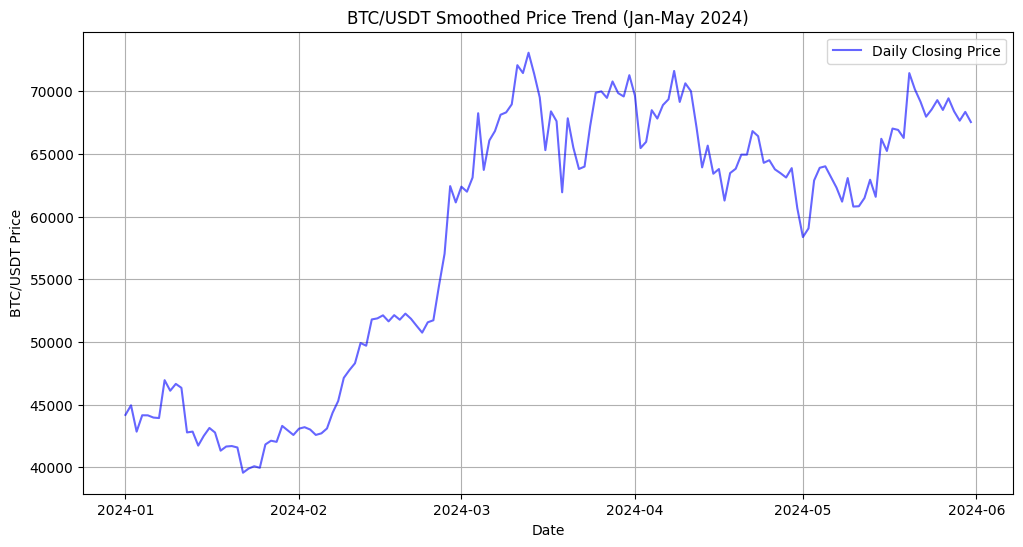

In [670]:
# Compute Smoothed Price Trend using a 7-day Rolling Average
df['smoothed_close'] = df['close'].rolling(window=7).mean()

# Plotting the Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Daily Closing Price', color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('BTC/USDT Price')
plt.title('BTC/USDT Smoothed Price Trend (Jan-May 2024)')
plt.legend()
plt.grid(True)
plt.show()